# Chapter 7. Regression

In [1]:
pwd()
using Pkg

In [2]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317


In [3]:
using Statistics

In [4]:
using StatsBase

In [5]:
using PyCall

In [6]:
using DataFrames

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1317


In [7]:
using GLM

┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1317


In [10]:
# Pkg.add("GLM")

    Updating registry at `C:\Users\user\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed GLM ─ v1.4.1
    Updating `C:\Users\user\.julia\environments\v1.6\Project.toml`
  [38e38edf] + GLM v1.4.1
    Updating `C:\Users\user\.julia\environments\v1.6\Manifest.toml`
  [38e38edf] + GLM v1.4.1
Precompiling project...
  ✓ GLM
1 dependency successfully precompiled in 16 seconds (304 already precompiled)


In [8]:
using Tables

In [12]:
# Pkg.add("Tables")

   Resolving package versions...
   Installed Tables ─ v1.4.2
    Updating `C:\Users\user\.julia\environments\v1.6\Project.toml`
  [bd369af6] + Tables v1.4.2
    Updating `C:\Users\user\.julia\environments\v1.6\Manifest.toml`
  [bd369af6] ↑ Tables v1.4.1 ⇒ v1.4.2
Precompiling project...
  ✓ Tables
  ? TableOperations
  ? PrettyTables
  ? XLSX
  ? CSV
  ? StatsModels
  ? StructArrays
  ? DataFrames
  ? GeometryBasics
  ? StatsPlots
  ? ShaderAbstractions
1 dependency successfully precompiled in 11 seconds (294 already precompiled)
10 dependencies failed but may be precompilable after restarting julia


In [9]:
using XLSX

┌ Info: Precompiling XLSX [fdbf4ff8-1666-58a4-91e7-1b58723a45e0]
└ @ Base loading.jl:1317


In [10]:
using MLBase

In [11]:
using RDatasets

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1317


In [14]:
using LsqFit

In [13]:
Pkg.add("LsqFit")

    Updating registry at `C:\Users\user\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `C:\Users\user\.julia\environments\v1.6\Project.toml`
  [2fda8390] + LsqFit v0.11.0
  No Changes to `C:\Users\user\.julia\environments\v1.6\Manifest.toml`
Precompiling project...
  ✓ TableOperations
  ✓ ShaderAbstractions
  ✓ Packing
  ✓ ScikitLearn
  ✓ MeshIO
  ✓ GLMNet
  ✓ FreeTypeAbstraction
  ✓ GridLayoutBase
  ✓ RCall
  ✓ StatsPlots
  ✓ AbstractPlotting
  ✓ GLMakie
  ✓ Makie
13 dependencies successfully precompiled in 141 seconds (292 already precompiled)


In [19]:
xvals = repeat(1:0.5:10, inner = 2) 
# repeat(시작:간격:끝)
# inner = 2 -> 1, 1, 2, 2, 이런 식의 반복이고
# outer = 2 -> 1, 2, 1, 2 이런 식의 반복이 됨 
print(xvals)

[1.0, 1.0, 1.5, 1.5, 2.0, 2.0, 2.5, 2.5, 3.0, 3.0, 3.5, 3.5, 4.0, 4.0, 4.5, 4.5, 5.0, 5.0, 5.5, 5.5, 6.0, 6.0, 6.5, 6.5, 7.0, 7.0, 7.5, 7.5, 8.0, 8.0, 8.5, 8.5, 9.0, 9.0, 9.5, 9.5, 10.0, 10.0]

In [16]:
?repeat

search: repeat repeat! norepeats RecipeData true_positive_rate repeach



```
repeat(A::AbstractArray, counts::Integer...)
```

Construct an array by repeating array `A` a given number of times in each dimension, specified by `counts`.

# Examples

```jldoctest
julia> repeat([1, 2, 3], 2)
6-element Vector{Int64}:
 1
 2
 3
 1
 2
 3

julia> repeat([1, 2, 3], 2, 3)
6×3 Matrix{Int64}:
 1  1  1
 2  2  2
 3  3  3
 1  1  1
 2  2  2
 3  3  3
```

---

```
repeat(A::AbstractArray; inner=ntuple(x->1, ndims(A)), outer=ntuple(x->1, ndims(A)))
```

Construct an array by repeating the entries of `A`. The i-th element of `inner` specifies the number of times that the individual entries of the i-th dimension of `A` should be repeated. The i-th element of `outer` specifies the number of times that a slice along the i-th dimension of `A` should be repeated. If `inner` or `outer` are omitted, no repetition is performed.

# Examples

```jldoctest
julia> repeat(1:2, inner=2)
4-element Vector{Int64}:
 1
 1
 2
 2

julia> repeat(1:2, outer=2)
4-element Vector{Int64}:
 1
 2
 1
 2

julia> repeat([1 2; 3 4], inner=(2, 1), outer=(1, 3))
4×6 Matrix{Int64}:
 1  2  1  2  1  2
 1  2  1  2  1  2
 3  4  3  4  3  4
 3  4  3  4  3  4
```

---

```
repeat(s::AbstractString, r::Integer)
```

Repeat a string `r` times. This can be written as `s^r`.

See also: [`^`](@ref :^(::Union{AbstractString, AbstractChar}, ::Integer))

# Examples

```jldoctest
julia> repeat("ha", 3)
"hahaha"
```

---

```
repeat(c::AbstractChar, r::Integer) -> String
```

Repeat a character `r` times. This can equivalently be accomplished by calling [`c^r`](@ref :^(::Union{AbstractString, AbstractChar}, ::Integer)).

# Examples

```jldoctest
julia> repeat('A', 3)
"AAA"
```

---

```
repeat(df::AbstractDataFrame; inner::Integer = 1, outer::Integer = 1)
```

Construct a data frame by repeating rows in `df`. `inner` specifies how many times each row is repeated, and `outer` specifies how many times the full set of rows is repeated.

# Example

```jldoctest
julia> df = DataFrame(a = 1:2, b = 3:4)
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     2      4

julia> repeat(df, inner = 2, outer = 3)
12×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     1      3
   3 │     2      4
   4 │     2      4
   5 │     1      3
   6 │     1      3
   7 │     2      4
   8 │     2      4
   9 │     1      3
  10 │     1      3
  11 │     2      4
  12 │     2      4
```

---

```
repeat(df::AbstractDataFrame, count::Integer)
```

Construct a data frame by repeating each row in `df` the number of times specified by `count`.

# Example

```jldoctest
julia> df = DataFrame(a = 1:2, b = 3:4)
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     2      4

julia> repeat(df, 2)
4×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     2      4
   3 │     1      3
   4 │     2      4
```


### 1. Linear Regression

In [23]:
import Random
Random.seed!(1234)

MersenneTwister(1234)

> - 메르센 트위스터(Mersenne Twister)는 1997년에 마츠모토 마코토(松本 眞)와 니시무라 다쿠지(西村 拓士)가 개발한 유사난수 생성기이다.[1] 메르센 트위스터는 동일한 저자들이 개발한 TT800 생성기의 개선판으로, 기존 생성기들의 문제점들을 피하면서 매우 질이 좋은 난수를 빠르게 생성할 수 있도록 설계되었다.

> - 메르센 트위스터의 이름은 난수의 반복 주기가 메르센 소수인 데에서 유래했다. 메르센 트위스터는 그 속도와 난수의 품질 때문에 점점 많은 곳에서 채택되고 있으며, 흔히 주기가 $2^{19937-1}$ 인 MT19937을 사용한다. MT19937과 같으나 생성해 내는 난수가 32비트가 아닌 64비트인 MT19937-64도 쓰이며, 2006년에 동일한 저자들이 발표한 SIMD 기반 메르센 트위스터는 MT19937에 비해 대략 두 배 정도 빠른 것으로 알려져 있다.

> - 난수의 품질에도 불구하고, 메르센 트위스터는 암호학적으로 안전한 유사난수 생성기가 아니다. 즉 난수의 특성(주기, 난수 범위)을 알고 있을 때 유한한 수의 난수(이 경우 624개)만으로 현재 생성기의 상태를 알아 낼 수 있으며, 그 뒤에 나올 난수를 예측해 낼 수 있다. 암호학적으로 안전한 유사난수 생성기를 얻기 위해서는 해시 함수를 사용해야 하지만 난수의 생성 속도가 낮아진다. 또는 블룸 블룸 슙(BBS)과 같이 암호학적으로 안전하게 설계된 생성기를 쓸 수도 있다.

* https://ko.wikipedia.org/wiki/%EB%A9%94%EB%A5%B4%EC%84%BC_%ED%8A%B8%EC%9C%84%EC%8A%A4%ED%84%B0

In [24]:
yvals = 3 .+ xvals .+ 2 .* rand(length(xvals)) .- 1

38-element Vector{Float64}:
  4.1816892773314205
  4.533594073004519
  4.632474833012372
  4.420170684925035
  5.5880514206635885
  5.7082931807581
  4.901172069867682
  5.097228556686824
  5.493674373220018
  6.159344466738084
  6.7977639004186905
  5.521811779271191
  6.132846073910675
  ⋮
  9.689088978928005
 10.12985244783997
 10.255619797787377
 10.748373429662148
 12.362230302489117
 11.377877918662044
 11.493724960949821
 11.023639166958214
 11.592085652792997
 12.492337345444918
 13.464000762999449
 12.598115053404763

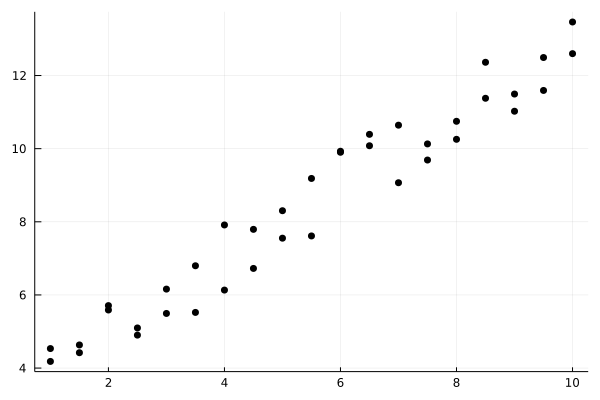

In [25]:
scatter(xvals, yvals, color =:black, leg = false)

In [28]:
function find_best_fit(xvals, yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals, yvals)
    a = r*stdy/stdx
    b = meany - a*meanx
    return a, b 
end

find_best_fit (generic function with 1 method)

In [37]:
@time a, b = find_best_fit(xvals, yvals)
ynew = a .* xvals .+ b

  0.000023 seconds (5 allocations: 128 bytes)


38-element Vector{Float64}:
  4.141935745569006
  4.141935745569006
  4.62175966572605
  4.62175966572605
  5.101583585883095
  5.101583585883095
  5.58140750604014
  5.58140750604014
  6.061231426197184
  6.061231426197184
  6.541055346354229
  6.541055346354229
  7.0208792665112725
  ⋮
 10.379646707610584
 10.379646707610584
 10.859470627767628
 10.859470627767628
 11.339294547924673
 11.339294547924673
 11.819118468081719
 11.819118468081719
 12.298942388238762
 12.298942388238762
 12.778766308395808
 12.778766308395808

In [30]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\user\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

  0.000551 seconds (42 allocations: 2.188 KiB)


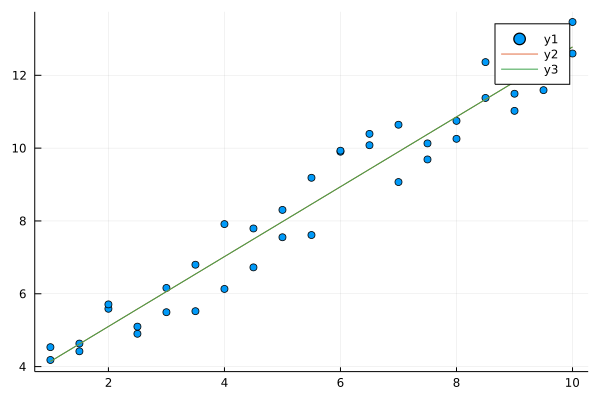

In [38]:
xdata = xvals;
ydata = yvals;
@time myfit = np.polyfit(xdata, ydata, 1);
ynew2 = collect(xdata) .* myfit[1] .+ myfit[2];
scatter(xvals, yvals)
plot!(xvals, ynew)
plot!(xvals, ynew2)

  0.000154 seconds (147 allocations: 14.094 KiB)


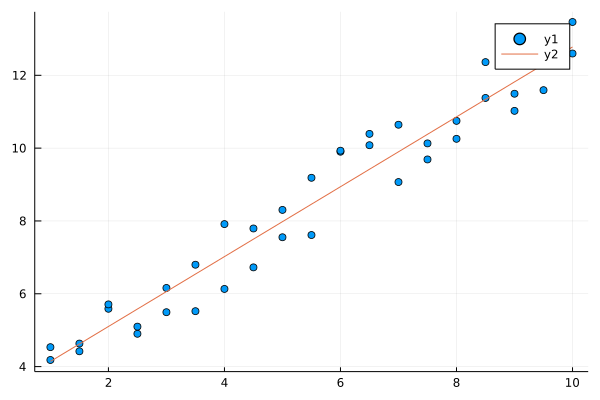

In [44]:
data = DataFrame(X = xdata, Y = ydata)
@time ols = lm(@formula(Y ~ X), data)
scatter(xvals, yvals)
plot!(xdata, predict(ols))

### 실제 데이터를 이용한 선형 회귀 실습

In [48]:
# play  around with data for a bit
R = XLSX.readxlsx("./DataScience-main/data/zillow_data_download_april2020.xlsx")

XLSXFile("zillow_data_download_april2020.xlsx") containing 4 Worksheets
            sheetname size          range        
-------------------------------------------------
 MonthlyListings_City 8348x91       A1:CM8348    
     Sale_counts_city 28760x148     A1:ER28760   
Sales_median_price_c… 3767x148      A1:ER3767    
                 meta 1x1           A1:A1        


In [54]:
typeof(R) # 여러개의 sheet를 한 번에 R이라는 객체에 저장해 놓음

XLSX.XLSXFile

XLSX 패키지의 함수들을 찾아보려면 아래 주소로
> https://felipenoris.github.io/XLSX.jl/stable/api/

In [55]:
XLSX.sheetnames(R)

4-element Vector{String}:
 "MonthlyListings_City"
 "Sale_counts_city"
 "Sales_median_price_city"
 "meta"

In [56]:
XLSX.sheetnames(R)[2]

"Sale_counts_city"

In [58]:
sale_counts = R["Sale_counts_city"][:]
df_sale_counts = DataFrame(sale_counts[2:end, :], Symbol.(sale_counts[1,:]))
# DataFrame 만드는 방법 중 한 가지
# matrix를 넣고 거기에 맞는 컬럼 네임을 넣어준다
# column name은  Symbol.() 함수를 이용

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05
,Any,Any,Any,Any,Any,Any,Any
1,6181,New York,New York,1,missing,missing,missing
2,12447,Los Angeles,California,2,1446,1705,1795
3,39051,Houston,Texas,3,2926,3121,3220
4,17426,Chicago,Illinois,4,2910,3022,2937
5,6915,San Antonio,Texas,5,1479,1529,1582
6,13271,Philadelphia,Pennsylvania,6,1609,1795,1709
7,40326,Phoenix,Arizona,7,1310,1519,1654
8,18959,Las Vegas,Nevada,8,1618,1856,1961
9,54296,San Diego,California,9,772,1057,1195


In [59]:
propertynames(df_sale_counts)

148-element Vector{Symbol}:
 :RegionID
 :RegionName
 :StateName
 :SizeRank
 Symbol("2008-03")
 Symbol("2008-04")
 Symbol("2008-05")
 Symbol("2008-06")
 Symbol("2008-07")
 Symbol("2008-08")
 Symbol("2008-09")
 Symbol("2008-10")
 Symbol("2008-11")
 ⋮
 Symbol("2019-03")
 Symbol("2019-04")
 Symbol("2019-05")
 Symbol("2019-06")
 Symbol("2019-07")
 Symbol("2019-08")
 Symbol("2019-09")
 Symbol("2019-10")
 Symbol("2019-11")
 Symbol("2019-12")
 Symbol("2020-01")
 Symbol("2020-02")

In [60]:
monthly_listings = R["MonthlyListings_City"][:]
df_monthly_listings = DataFrame(monthly_listings[2:end, :],
                                Symbol.(monthly_listings[1, :]))

,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03
,Any,Any,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,28904,28155,30596
2,2,12447,Los Angeles,City,CA,6431,6613,6467
3,3,39051,Houston,City,TX,11696,11737,12291
4,4,17426,Chicago,City,IL,9523,9609,9772
5,5,6915,San Antonio,City,TX,7223,7170,7438
6,6,13271,Philadelphia,City,PA,7505,7266,7578
7,7,40326,Phoenix,City,AZ,6232,5720,5872
8,8,18959,Las Vegas,City,NV,7027,6218,6199
9,9,54296,San Diego,City,CA,4121,3844,3932


In [61]:
monthly_listings_2020_02 = df_monthly_listings[!, [1,2,3,4,5,end]]

,SizeRank,RegionID,RegionName,RegionType,StateName,2020-02
,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,21164
2,2,12447,Los Angeles,City,CA,5553
3,3,39051,Houston,City,TX,11654
4,4,17426,Chicago,City,IL,9417
5,5,6915,San Antonio,City,TX,6887
6,6,13271,Philadelphia,City,PA,5110
7,7,40326,Phoenix,City,AZ,4419
8,8,18959,Las Vegas,City,NV,6749
9,9,54296,San Diego,City,CA,2305


In [62]:
rename!(monthly_listings_2020_02, Symbol("2020-02") .=> Symbol("listings"))

,SizeRank,RegionID,RegionName,RegionType,StateName,listings
,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,21164
2,2,12447,Los Angeles,City,CA,5553
3,3,39051,Houston,City,TX,11654
4,4,17426,Chicago,City,IL,9417
5,5,6915,San Antonio,City,TX,6887
6,6,13271,Philadelphia,City,PA,5110
7,7,40326,Phoenix,City,AZ,4419
8,8,18959,Las Vegas,City,NV,6749
9,9,54296,San Diego,City,CA,2305


In [63]:
sale_counts_2020_02 = df_sale_counts[!, [1, end]]

,RegionID,2020-02
,Any,Any
1,6181,4054
2,12447,1522
3,39051,2682
4,17426,2100
5,6915,1626
6,13271,1620
7,40326,2325
8,18959,2547
9,54296,missing


In [64]:
rename!(sale_counts_2020_02, Symbol("2020-02") .=> Symbol("sales"))

,RegionID,sales
,Any,Any
1,6181,4054
2,12447,1522
3,39051,2682
4,17426,2100
5,6915,1626
6,13271,1620
7,40326,2325
8,18959,2547
9,54296,missing


In [65]:
Feb2020data

LoadError: UndefVarError: Feb2020data not defined

In [76]:
Feb2020data_join = innerjoin(monthly_listings_2020_02, sale_counts_2020_02, on=:RegionID)

,SizeRank,RegionID,RegionName,RegionType,StateName,listings,sales
,Any,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,21164,4054
2,2,12447,Los Angeles,City,CA,5553,1522
3,3,39051,Houston,City,TX,11654,2682
4,4,17426,Chicago,City,IL,9417,2100
5,5,6915,San Antonio,City,TX,6887,1626
6,6,13271,Philadelphia,City,PA,5110,1620
7,7,40326,Phoenix,City,AZ,4419,2325
8,8,18959,Las Vegas,City,NV,6749,2547
9,9,54296,San Diego,City,CA,2305,missing


In [77]:
# 결측치 제거
# 그냥 함수에 넣으면 함수의 입력으로 들어간 df도 함께 결측치가 제거되어
# 덮어 씌어져 있게 됨 -> copy 함수 사용
Feb2020data = dropmissing!(copy(Feb2020data_join))

,SizeRank,RegionID,RegionName,RegionType,StateName,listings,sales
,Any,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,21164,4054
2,2,12447,Los Angeles,City,CA,5553,1522
3,3,39051,Houston,City,TX,11654,2682
4,4,17426,Chicago,City,IL,9417,2100
5,5,6915,San Antonio,City,TX,6887,1626
6,6,13271,Philadelphia,City,PA,5110,1620
7,7,40326,Phoenix,City,AZ,4419,2325
8,8,18959,Las Vegas,City,NV,6749,2547
9,10,38128,Dallas,City,TX,4317,1292


In [78]:
nrow(Feb2020data)

5508

In [79]:
nrow(Feb2020data_join)

8192

In [75]:
?dropmissing!

search: dropmissing! dropmissing



```
dropmissing!(df::AbstractDataFrame, cols=:; disallowmissing::Bool=true)
```

Remove rows with missing values from data frame `df` and return it.

If `cols` is provided, only missing values in the corresponding columns are considered. `cols` can be any column selector (`Symbol`, string or integer; `:`, `Cols`, `All`, `Between`, `Not`, a regular expression, or a vector of `Symbol`s, strings or integers).

If `disallowmissing` is `true` (the default) then the `cols` columns will get converted using [`disallowmissing!`](@ref).

See also: [`dropmissing`](@ref) and [`completecases`](@ref).

```jldoctest
julia> df = DataFrame(i = 1:5,
                      x = [missing, 4, missing, 2, 1],
                      y = [missing, missing, "c", "d", "e"])
5×3 DataFrame
 Row │ i      x        y
     │ Int64  Int64?   String?
─────┼─────────────────────────
   1 │     1  missing  missing
   2 │     2        4  missing
   3 │     3  missing  c
   4 │     4        2  d
   5 │     5        1  e

julia> dropmissing!(copy(df))
2×3 DataFrame
 Row │ i      x      y
     │ Int64  Int64  String
─────┼──────────────────────
   1 │     4      2  d
   2 │     5      1  e

julia> dropmissing!(copy(df), disallowmissing=false)
2×3 DataFrame
 Row │ i      x       y
     │ Int64  Int64?  String?
─────┼────────────────────────
   1 │     4       2  d
   2 │     5       1  e

julia> dropmissing!(copy(df), :x)
3×3 DataFrame
 Row │ i      x      y
     │ Int64  Int64  String?
─────┼───────────────────────
   1 │     2      4  missing
   2 │     4      2  d
   3 │     5      1  e

julia> dropmissing!(df, [:x, :y])
2×3 DataFrame
 Row │ i      x      y
     │ Int64  Int64  String
─────┼──────────────────────
   1 │     4      2  d
   2 │     5      1  e
```


In [81]:
sales = Feb2020data[!, :sales]

5508-element Vector{Any}:
 4054
 1522
 2682
 2100
 1626
 1620
 2325
 2547
 1292
 1023
  439
 1439
 1059
    ⋮
    6
    4
    0
    2
    5
    1
    3
    1
    1
    1
    9
    6

In [82]:
counts = Feb2020data[!, :listings]

5508-element Vector{Any}:
 21164
  5553
 11654
  9417
  6887
  5110
  4419
  6749
  4317
  1826
   780
  2369
  3334
     ⋮
    42
    48
    27
    39
    39
    29
    11
    28
    25
    19
    23
    62

In [83]:
using DataStructures

In [85]:
states = Feb2020data[!, :StateName]

5508-element Vector{Any}:
 "NY"
 "CA"
 "TX"
 "IL"
 "TX"
 "PA"
 "AZ"
 "NV"
 "TX"
 "TX"
 "CA"
 "NC"
 "TX"
 ⋮
 "NC"
 "TX"
 "ME"
 "GA"
 "FL"
 "CA"
 "IA"
 "WA"
 "MT"
 "IL"
 "TX"
 "TX"

In [86]:
C = counter(states)

Accumulator{Any, Int64} with 50 entries:
  "DC" => 1
  "NH" => 86
  "UT" => 41
  "WV" => 35
  "NY" => 195
  "MN" => 121
  "GA" => 73
  "TX" => 262
  "LA" => 60
  "MS" => 42
  "IA" => 52
  "IL" => 324
  "NM" => 27
  "OK" => 70
  "RI" => 33
  "NJ" => 291
  "KS" => 42
  "ID" => 31
  "OH" => 232
  "HI" => 34
  "MA" => 148
  "VT" => 21
  "MT" => 23
  "MI" => 286
  "MO" => 134
  ⋮    => ⋮

In [87]:
?counter

search: counter count_zeros counteq countne countlines count_ones columntable



```
counter(seq)
```

Returns an `Accumulator` object containing the elements from `seq`.


In [88]:
C.map

Dict{Any, Int64} with 50 entries:
  "DC" => 1
  "NH" => 86
  "UT" => 41
  "WV" => 35
  "NY" => 195
  "MN" => 121
  "GA" => 73
  "TX" => 262
  "LA" => 60
  "MS" => 42
  "IA" => 52
  "IL" => 324
  "NM" => 27
  "OK" => 70
  "RI" => 33
  "NJ" => 291
  "KS" => 42
  "ID" => 31
  "OH" => 232
  "HI" => 34
  "MA" => 148
  "VT" => 21
  "MT" => 23
  "MI" => 286
  "MO" => 134
  ⋮    => ⋮

In [91]:
using StatsBase

countmap(states) # counter.map과 같은 결과 도출 

Dict{Any, Int64} with 50 entries:
  "DC" => 1
  "NH" => 86
  "UT" => 41
  "WV" => 35
  "NY" => 195
  "MN" => 121
  "GA" => 73
  "TX" => 262
  "LA" => 60
  "MS" => 42
  "IA" => 52
  "IL" => 324
  "NM" => 27
  "OK" => 70
  "RI" => 33
  "NJ" => 291
  "KS" => 42
  "ID" => 31
  "OH" => 232
  "HI" => 34
  "MA" => 148
  "VT" => 21
  "MT" => 23
  "MI" => 286
  "MO" => 134
  ⋮    => ⋮

In [92]:
countvals = values(C.map)

ValueIterator for a Dict{Any, Int64} with 50 entries. Values:
  1
  86
  41
  35
  195
  121
  73
  262
  60
  42
  52
  324
  27
  70
  33
  291
  42
  31
  232
  34
  148
  21
  23
  286
  134
  ⋮

In [93]:
topstates = sortperm(collect(countvals), rev = true)[1:10]

10-element Vector{Int64}:
 28
 26
 12
 16
 24
  8
 49
 19
 33
  5

In [94]:
states_of_interest = collect(keys(C.map))[topstates]

10-element Vector{Any}:
 "CA"
 "FL"
 "IL"
 "NJ"
 "MI"
 "TX"
 "PA"
 "OH"
 "NC"
 "NY"

In [96]:
all_plots = Array{Plots.Plot}(undef, 10)

10-element Vector{Plots.Plot}:
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

(si, coef(ols)) = ("CA", [0.29595375979515304])
(si, coef(ols)) = ("FL", [0.16693529057344902])
(si, coef(ols)) = ("IL", [0.22291703276169347])
(si, coef(ols)) = ("NJ", [0.25556391864492345])
(si, coef(ols)) = ("MI", [0.2925436820147375])
(si, coef(ols)) = ("TX", [0.24732835944836878])
(si, coef(ols)) = ("PA", [0.310066636803275])
(si, coef(ols)) = ("OH", [0.4569949754409864])
(si, coef(ols)) = ("NC", [0.4800747758857476])
(si, coef(ols)) = ("NY", [0.19151984869233082])


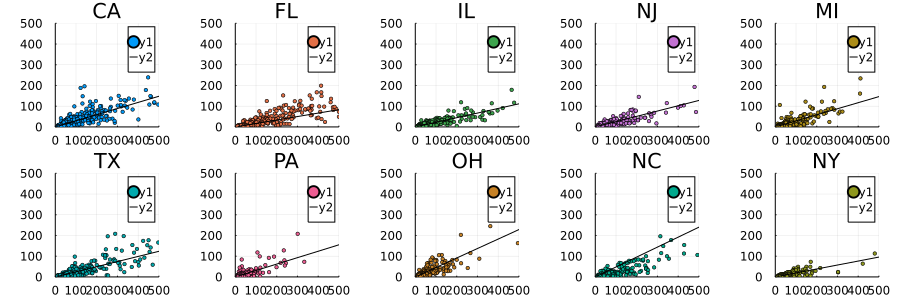

In [105]:
all_plots = Array{Plots.Plot}(undef, 10)
for (i, si ) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!, :StateName] .== si)
    data = DataFrame(X = float.(counts[curids]), Y = float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ 0 + X), data)
    all_plots[i] = scatter(counts[curids], sales[curids], markersize = 2,
                            xlim = (0, 500), ylim = (0, 500), color = i,
                            aspect_ratio =:equal, lengend = false, title = si)
    @show si, coef(ols)
    plot!(counts[curids], predict(ols), color =:black)
end
plot(all_plots..., layout = (2, 5), size = (900, 300))

In [98]:
i, si = enumerate(states_of_interest)

enumerate(Any["CA", "FL", "IL", "NJ", "MI", "TX", "PA", "OH", "NC", "NY"])

enumerate(iter)

An iterator that yields (i, x) where i is an index starting at 1, and x is the ith value from the given iterator. It's useful when you need not only the values x over which you are iterating, but also the index i of the iterations.

> http://www.jlhub.com/julia/manual/en/function/enumerate

(si, coef(ols)) = ("CA", [6.8030864646283105, 0.28798374289950357])
(si, coef(ols)) = ("FL", [19.12625581923338, 0.15510798334559428])
(si, coef(ols)) = ("IL", [0.6626439876883512, 0.2226325765807212])
(si, coef(ols)) = ("NJ", [-1.9635911642225743, 0.2650303535602978])
(si, coef(ols)) = ("MI", [-0.9181942041703457, 0.29768705032459525])
(si, coef(ols)) = ("TX", [5.241220767319295, 0.24566620049636262])
(si, coef(ols)) = ("PA", [-0.2136244857995291, 0.3101955410309725])
(si, coef(ols)) = ("OH", [-6.026958739166814, 0.47909280478486926])
(si, coef(ols)) = ("NC", [-24.60003985327959, 0.5302793903364814])
(si, coef(ols)) = ("NY", [-0.20048638474403213, 0.191535092167981])


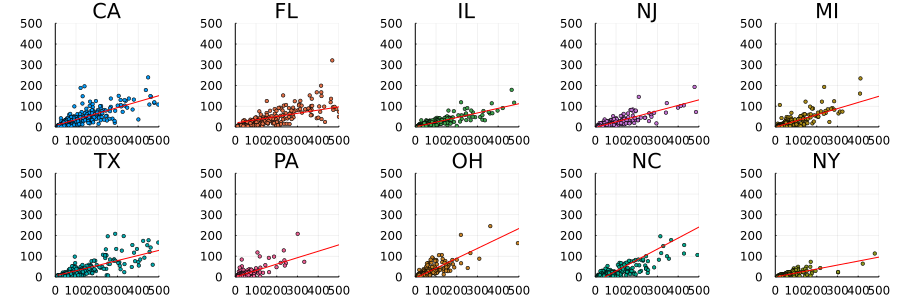

In [111]:
all_plots = Array{Plots.Plot}(undef, 10)
for (i, si) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!, :StateName] .== si)
    data = DataFrame(X = float.(counts[curids]), Y = float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ X), data)
    all_plots[i] = scatter(counts[curids], sales[curids], markersize = 2,
                            xlim = (0, 500), ylim = (0,500), color  = i, 
                            aspect_ratio =:equal, legend = false, title = si)
    @show si, coef(ols)
    plot!(counts[curids], predict(ols), color =:red)
end
plot(all_plots..., layout=(2,5), size=(900, 300))

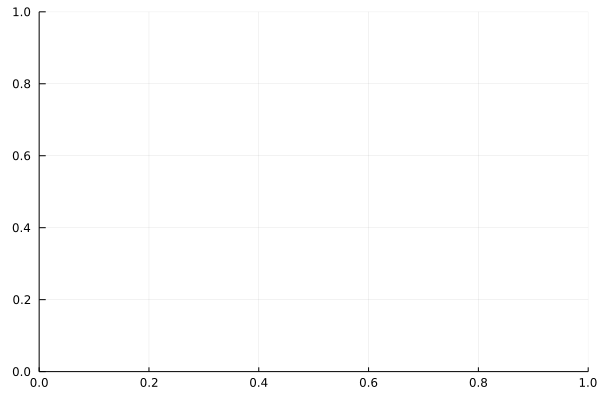

In [112]:
plot()

(si, coef(ols)) = ("CA", [0.29595375979515304])
(si, coef(ols)) = ("FL", [0.16693529057344902])
(si, coef(ols)) = ("IL", [0.22291703276169347])
(si, coef(ols)) = ("NJ", [0.25556391864492345])
(si, coef(ols)) = ("MI", [0.2925436820147375])
(si, coef(ols)) = ("TX", [0.24732835944836878])
(si, coef(ols)) = ("PA", [0.310066636803275])
(si, coef(ols)) = ("OH", [0.4569949754409864])
(si, coef(ols)) = ("NC", [0.4800747758857476])
(si, coef(ols)) = ("NY", [0.19151984869233082])


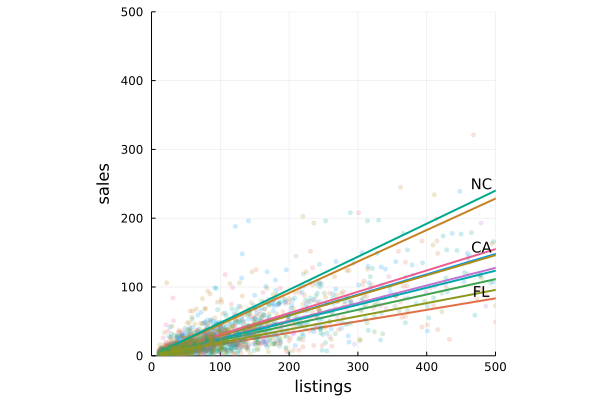

In [114]:
for(i, si) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!, :StateName].== si)
    data = DataFrame(X = float.(counts[curids]), Y = float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ 0 + X), data)
    scatter!(counts[curids], sales[curids], markersize = 2,
            xlim = (0, 500), ylim = (0, 500), color = i, aspect_ratio =:equal,
            legend = false, marker = (3, 3, stroke(0)), alpha = 0.2)
        if si == "NC" || si == "CA" || si == "FL"
            annotate!([(500-20, 10+coef(ols)[1]*500, text(si, 10))])
        end
    @show si, coef(ols)
    plot!(counts[curids], predict(ols), color = i, linewidth = 2)
end

# plot(all_plots..., layout = (2, 5), color = i, linewidth = 2)

xlabel!("listings")
ylabel!("sales")

## 2. Logistic Regression

In [118]:
data = DataFrame(X = [1,2,3,4,5,6,7], Y = [1,0,1,1,1,1,1])

,X,Y
,Int64,Int64
1,1,1
2,2,0
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1


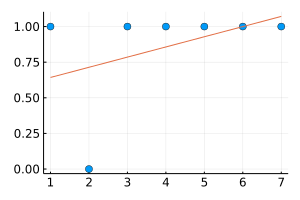

In [119]:
linear_reg = lm(@formula(Y ~ X), data)
scatter(data[!,:X], data[!, :Y], legend = false, size = (300, 200))
plot!(1:7, predict(linear_reg))

#### GLM 패키지에서 사용할 수 있는 link function
- Binomial(), LogitLink()

In [122]:
# RDatasets의 cats 데이터를 불러온다
cats = dataset("MASS", "cats")

,Sex,BWt,HWt
,Cat…,Float64,Float64
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
6,F,2.1,7.6
7,F,2.1,8.1
8,F,2.1,8.2
9,F,2.1,8.3


In [123]:
labelmap(cats[!, :Sex])

LabelMap (with 2 labels):
[1] F
[2] M


In [124]:
lmap = labelmap(cats[!, :Sex])

LabelMap (with 2 labels):
[1] F
[2] M


In [125]:
ci = labelencode(lmap, cats[!, :Sex])

144-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

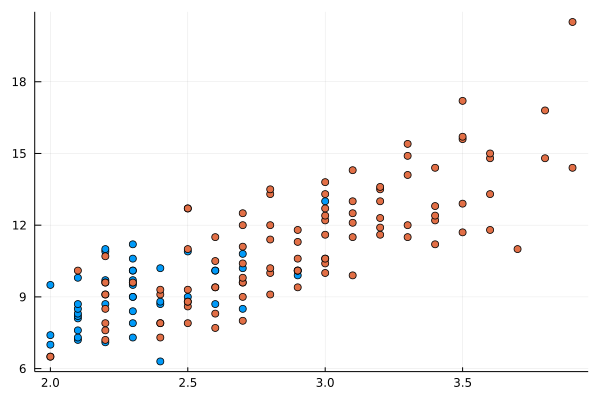

In [127]:
scatter(cats[!, :BWt], cats[!, :HWt], color = ci, legend = false)

In [128]:
data = DataFrame(X = cats[!, :HWt], Y = ci.-1)

,X,Y
,Float64,Int64
1,7.0,0
2,7.4,0
3,9.5,0
4,7.2,0
5,7.3,0
6,7.6,0
7,8.1,0
8,8.2,0
9,8.3,0


In [129]:
probit = glm(@formula(Y ~ X), data, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -4.54238    1.13147   -4.01    <1e-04   -6.76002  -2.32475
X             0.51971    0.114201   4.55    <1e-05    0.29588   0.743539
────────────────────────────────────────────────────────────────────────

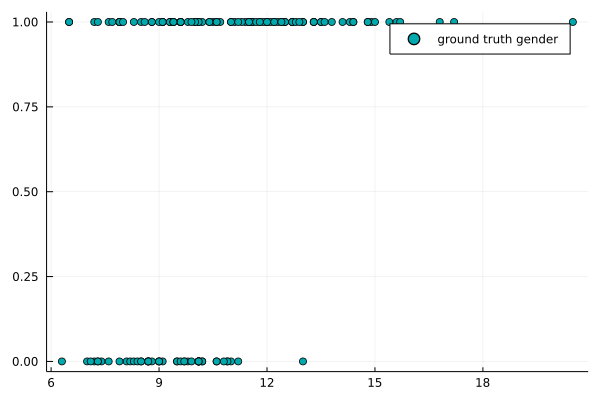

In [131]:
scatter(data[!, :X], data[!, :Y], label = "ground truth gender", color = 6)

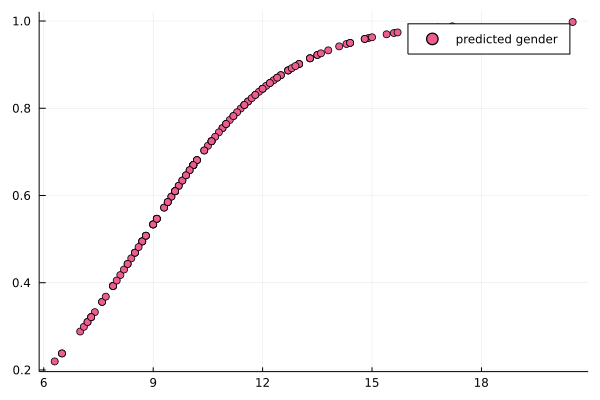

In [132]:
scatter(data[!, :X], predict(probit), label ="predicted gender", color = 7)

## 3. Non Linear Regression

- a quadratic function, a cubic function, an exponential function...

> 보통 최소제곱법(최소제곱오차)를 이용하여 함수에 적합(fitting), 이를 지원하는 패키지 LsqFit 사용(수치 최적화 문제 numerical optimization problem 에 자주 사용)

> The LsqFit package is a small library that provides basic least-squares fitting in pure Julia under an MIT license. The basic functionality was originaly in Optim.jl, before being separated into this library. At this time, LsqFit only utilizes the Levenberg-Marquardt algorithm for non-linear fitting.

> * https://github.com/JuliaNLSolvers/LsqFit.jl

In [133]:
xvals = 0:0.05:10

0.0:0.05:10.0

In [135]:
exp(-xvals*2) 

LoadError: MethodError: no method matching exp(::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}})
[0mClosest candidates are:
[0m  exp([91m::StridedMatrix{var"#s832"} where var"#s832"<:Union{Float32, Float64, ComplexF32, ComplexF64}[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\LinearAlgebra\src\dense.jl:557
[0m  exp([91m::StridedMatrix{var"#s832"} where var"#s832"<:Union{Integer, Complex{var"#s831"} where var"#s831"<:Integer}[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\LinearAlgebra\src\dense.jl:558
[0m  exp([91m::LinearAlgebra.Hermitian{var"#s831", S} where {var"#s831"<:Complex, S<:(AbstractMatrix{var"#s832"} where var"#s832"<:var"#s831")}[39m) at C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\LinearAlgebra\src\symmetric.jl:925
[0m  ...

In [136]:
exp.(-xvals*2) 

201-element Vector{Float64}:
 1.0
 0.9048374180359595
 0.8187307530779818
 0.7408182206817179
 0.6703200460356393
 0.6065306597126334
 0.5488116360940265
 0.4965853037914095
 0.44932896411722156
 0.4065696597405991
 0.36787944117144233
 0.33287108369807955
 0.30119421191220214
 ⋮
 6.1920476826640385e-9
 5.602796437537268e-9
 5.069619862322287e-9
 4.587181746647525e-9
 4.1506536876982236e-9
 3.7556667659383025e-9
 3.398267819495071e-9
 3.074879879586606e-9
 2.782266371015873e-9
 2.517498719438278e-9
 2.277927041205371e-9
 2.061153622438558e-9

In [142]:
yvals = 1*exp.(-xvals*2) + 2*sin.(0.8*pi*xvals) + 0.15*randn(length(xvals));

In [151]:
length(yvals)

201

In [153]:
yvals[1:6] # head는 data frame에서만 지원됨

6-element Vector{Float64}:
 0.885280224268513
 0.9242899275724812
 1.3040861545159006
 1.3133844439114866
 1.5467499124825563
 1.7347855773828305

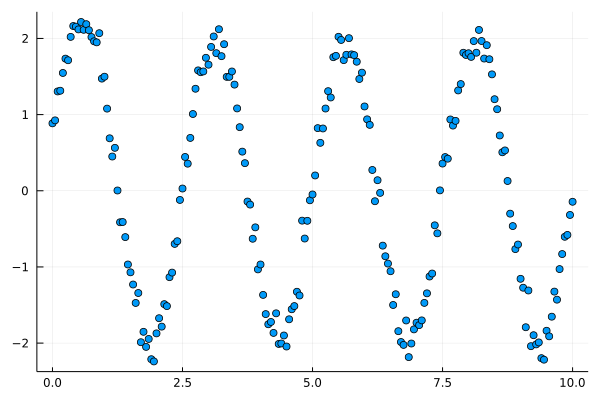

In [144]:
scatter(xvals, yvals, legend = false)

In [154]:
@. model(x, p) = p[1]*exp(-x*p[2]) + p[3]*sin(0.8*pi*x)

model (generic function with 1 method)

In [155]:
p0 = [0.5, 0.5, 0.5]
myfit = curve_fit(model, xvals, yvals, p0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.8540563005618206, 1.9623792241692664, 1.984423555034504], [-0.03122392370669247, 0.09866139233010673, -0.10870236867102445, 0.05341155401786035, -0.01393175769141064, -0.0454643659406786, 0.11877873614959666, -0.06168545055031438, -0.0977854117520156, -0.006236088041029486  …  0.11558487880999802, -0.022372489480078084, -0.20517363108724007, 0.07132894024375136, -0.138139511090708, -0.1251578514899101, -0.12632449870308515, 0.08615603990915272, 0.06867094583569427, 0.1444350697701904], [1.0000000000052196 0.0 0.0; 0.9065410541021867 -0.03871185495315128 0.12533323356236475; … ; 3.3116264914462438e-9 -2.8145411733454895e-8 -0.12533323356351966; 3.002235781172719e-9 -2.564385688146069e-8 0.0], true, Float64[])

> ⚠️ A note about curve_fit: this function can take multiple other inputs, for instance the Jacobian of what you are trying to fit. We don't dive into these details here, but be sure to check out the LsqFit package to see what other things you can can pass to create a better fit.

> Also note that julia has multiple packages that allow you to create Jacobians so you don't have to write them yourself. Two such packages are FiniteDifferences or ForwardDiff.

In [156]:
p = myfit.param

3-element Vector{Float64}:
 0.8540563005618206
 1.9623792241692664
 1.984423555034504

In [158]:
findyvals = p[1]*exp.(-xvals*p[2]) + p[3]*sin.(0.8*pi*xvals);
findyvals[1:5]

5-element Vector{Float64}:
 0.8540563005618206
 1.022951319902588
 1.1953837858448761
 1.366795997929347
 1.5328181547911457

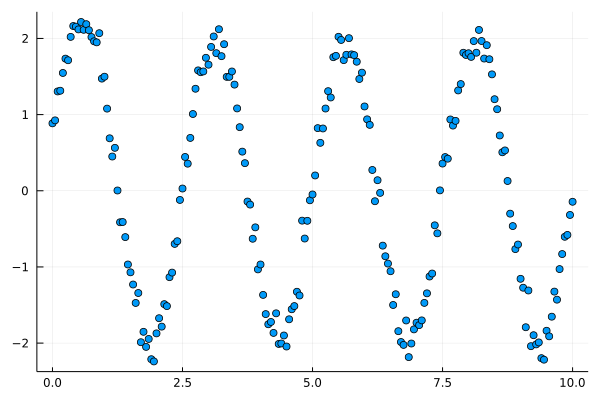

In [159]:
scatter(xvals, yvals, legend = false)

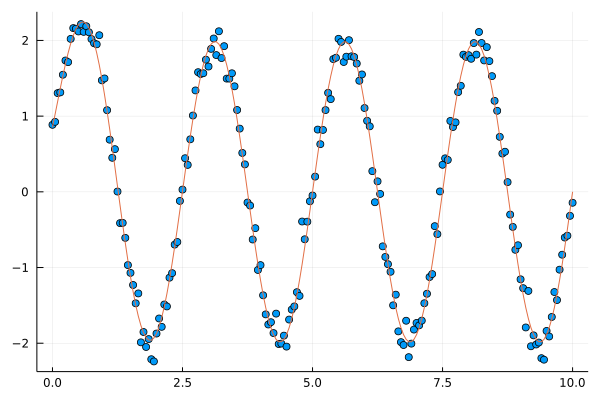

In [160]:
plot!(xvals, findyvals)

* 재미삼아 선형 함수에 대입

In [161]:
@. model(x, p) = p[1]*x
myfit = curve_fit(model, xvals, yvals, [0.5])
p = myfit.param
findyvals = p[1]*xvals

0.0:-0.001064898222694594:-0.21297964453891877

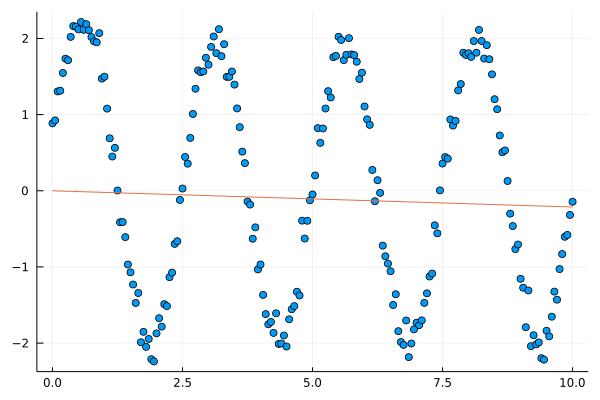

In [163]:
scatter(xvals, yvals, legend = false)
plot!(xvals, findyvals)

# Finally...
After finishing this notebook, you should be able to:
- [ ] run a linear regression model
- [ ] use the GLM package to pass functions and probability distributions to solve your special regression problem
- [ ] use GLM to solve a logistic regression problem
- [ ] fit a nonlinear regression to your data using the LsqFit package
- [ ] use the LsqFit package to fit a linear function too